## Setup

In [2]:
%matplotlib inline
from detail import Detail
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os
import pylab
import json
import random
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [14]:
annFile='../../../trainval_withkeypoints.json' # annotations 
imgDir='../../../VOCdevkit/VOC2010/JPEGImages' # jpeg images
phase='trainval'

In [15]:
# initialize detail api for instance annotations
details = Detail(annFile, imgDir, phase)

print('\n***info***')
details.info()

loading annotations into memory...
JSON root keys:dict_keys(['info', 'images', 'annos_segmentation', 'annos_occlusion', 'annos_boundary', 'annos_joints', 'categories', 'parts'])
Done (t=9.36s)
creating index...
10100 images loaded.
index created! (t=6.92s)

***info***
description: This is the 3.0 version of the CVPR 2017 PASCAL in Detail dataset.
version: 3.0
year: 2017
contributor: https://sites.google.com/view/pasd
date_created: 2017-07-18


## Show Categories

In [9]:
# display categories and supercategories
cats = details.getCats()

print('%d object categories (includes animals)' % len(details.getCats(supercat='object')))
print('%d background categories' % len(details.getCats(supercat='background')))
print('%d categories total' % len(cats))

names = set([cat['supercategory'] for cat in cats])
print('\nSupercategories: \n\t', ' '.join(names))

print('Categories: ')
for cat in cats:
    print('\t{name} ({category_id}): \t{supercategory}'.format(**cat))

48 object categories (includes animals)
11 background categories
59 categories total

Supercategories: 
	 animal background object
Categories: 
	aeroplane (2): 	object
	bicycle (23): 	object
	bird (25): 	animal
	boat (31): 	object
	bottle (34): 	object
	bus (45): 	object
	car (59): 	object
	cat (65): 	animal
	chair (72): 	object
	cow (98): 	animal
	diningtable (397): 	object
	dog (113): 	animal
	horse (207): 	animal
	motorbike (258): 	object
	person (284): 	object
	pottedplant (308): 	object
	sheep (347): 	animal
	sofa (368): 	object
	train (416): 	object
	tvmonitor (427): 	object
	bag (9): 	object
	bed (18): 	object
	bench (22): 	object
	book (33): 	object
	building (44): 	object
	cabinet (46): 	object
	ceiling (68): 	background
	cloth (80): 	object
	computer (85): 	object
	cup (104): 	object
	door (115): 	object
	fence (144): 	object
	floor (158): 	background
	flower (159): 	object
	food (162): 	object
	grass (187): 	background
	ground (189): 	background
	keyboard (220): 	object
	lig

## Filter Images by Category

In [11]:
print('%d images in the current phase (%s)' % (len(details.getImgs()), details.phase))

# get all images containing both a person and a motorbike
imgs = details.getImgs(cats=['person', 'motorbike']);
print('%d images contain both people and motorbikes' % len(imgs))

# select one at random (re-run this cell to select a new image)
#img = imgs[random.randrange(len(imgs))]
# OR
# use our example image
img = '2008_003429'

10100 images in the current phase (trainval)
254 images contain both people and motorbikes


## Display the Selected Image

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


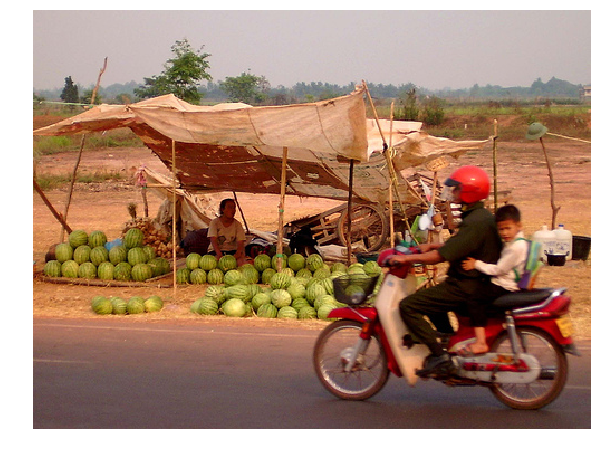


[u'road (324) : background', u'motorbike (258) : object', u'person (284) : object', u'tree (420) : background', u'ground (189) : background', u'wood (458) : object', u'cloth (80) : object', u'sky (360) : background', u'grass (187) : background']


In [6]:
# Read and display image
details.showImg(img)

# list names and ids of categories present in image
cats = details.getCats(imgs=img)
print("")
print(['%s (%d) : %s' % (cat['name'], cat['category_id'], cat['supercategory']) for cat in cats])

## Human Keypoints

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


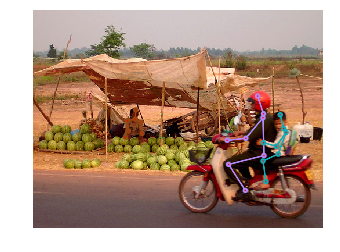

In [16]:
## Display human keypoints - red means keypoint is visible, blue means keypoint is inferred
kpts = details.getKpts(img, show=True)

## To get more information of the keypoints:
#skeleton_id = details.getImgs(img)[0]['keypoints']
#for i in skeleton_id:
#    print('keypoint list of skeleton %d'%i)
#    print(details.getKptAnno(i)['keypoints'])
#    print('\n')

## Categories (Semantic Classes)

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


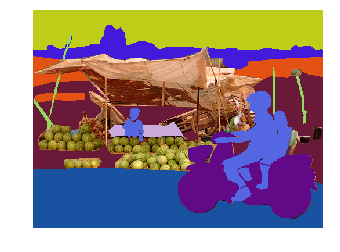

In [21]:
# Display semantic segmentation
mask = details.getMask(img, show=True)

## Instances (For Original 20 PASCAL Classes)

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


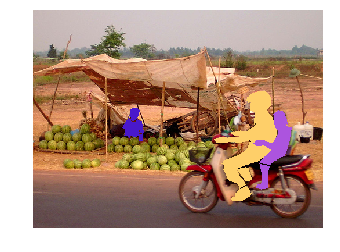

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


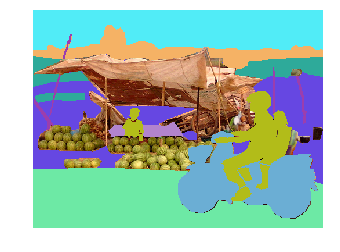

131.2022039235093
107891.56107108062


In [29]:
# Display person instance segmentation
mask1 = details.getMask(img, cat='person', show=True)
mask2 = details.getMask(img, show=True)
print(np.linalg.norm(mask1, 2))
print(np.linalg.norm(mask2, 2))

In [40]:
wtf = details.getCats()
a = dict()
for w in wtf:
    a[w['name']] = (w['category_id'], w['supercategory'])
for el in a:
    print(el, a[el])

aeroplane (2, 'object')
bicycle (23, 'object')
bird (25, 'animal')
boat (31, 'object')
bottle (34, 'object')
bus (45, 'object')
car (59, 'object')
cat (65, 'animal')
chair (72, 'object')
cow (98, 'animal')
diningtable (397, 'object')
dog (113, 'animal')
horse (207, 'animal')
motorbike (258, 'object')
person (284, 'object')
pottedplant (308, 'object')
sheep (347, 'animal')
sofa (368, 'object')
train (416, 'object')
tvmonitor (427, 'object')
bag (9, 'object')
bed (18, 'object')
bench (22, 'object')
book (33, 'object')
building (44, 'object')
cabinet (46, 'object')
ceiling (68, 'background')
cloth (80, 'object')
computer (85, 'object')
cup (104, 'object')
door (115, 'object')
fence (144, 'object')
floor (158, 'background')
flower (159, 'object')
food (162, 'object')
grass (187, 'background')
ground (189, 'background')
keyboard (220, 'object')
light (232, 'object')
mountain (259, 'object')
mouse (260, 'object')
curtain (105, 'object')
platform (296, 'background')
sign (355, 'object')
plate

## Object Detection & Objectness 

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,
categories: [u'motorbike', u'person', u'person', u'person']


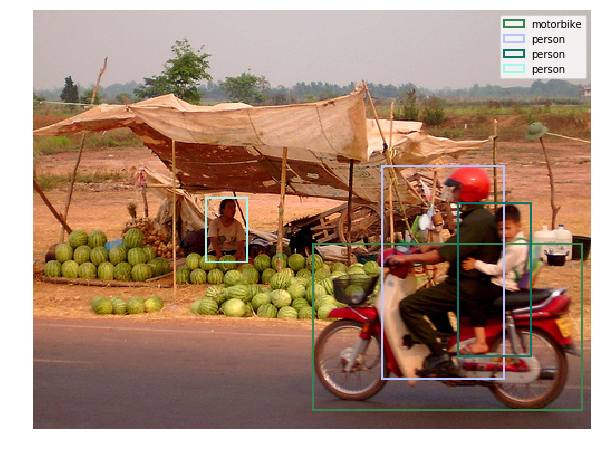

In [14]:
# get bbox for every object in the image (good for objectness estimation)
bboxes = details.getBboxes(img, show=True)

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,
categories: [u'person', u'person', u'person']


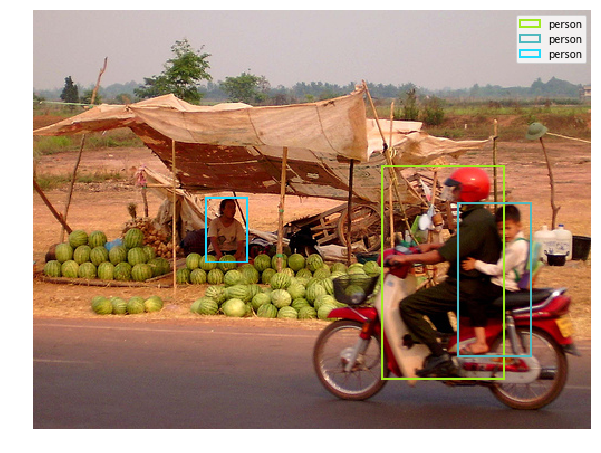

In [15]:
# get bbox for every person in the image.
bboxes = details.getBboxes(img, cat='person', show=True)

## Parts

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


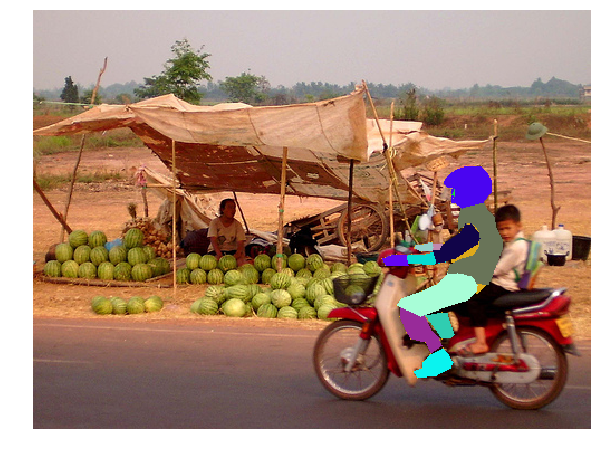

In [16]:
# show parts for the first person instance we find
mask = details.getMask(img, cat='person', instance='#0', show=True)

In [17]:
# list parts (with integer IDs and superparts) for each person part
personParts = details.getParts(cat='person')
['{name} ({part_id})'.format(**part) \
     + (' : {}'.format(part['superpart']) if part['superpart'] != 'none' else '')
 for part in personParts]

['hair (19) : head',
 'head (21) : head',
 'lear (30) : head',
 'lebrow (31) : head',
 'leye (34) : head',
 'lfoot (38) : leftleg',
 'lhand (39) : leftarm',
 'llarm (41) : leftarm',
 'llleg (43) : leftleg',
 'luarm (44) : leftarm',
 'luleg (45) : leftleg',
 'mouth (47) : head',
 'neck (49) : torso',
 'nose (50) : head',
 'rear (57) : head',
 'rebrow (58) : head',
 'reye (59) : head',
 'rfoot (63) : rightleg',
 'rhand (65) : rightarm',
 'rlarm (69) : rightarm',
 'rlleg (71) : rightleg',
 'ruarm (73) : rightarm',
 'ruleg (74) : rightleg',
 'torso (79) : torso',
 'silh (255)']

Person superparts: [u'head', u'rightarm', u'leftarm', u'rightleg', u'leftleg', u'torso']
Person left arm: 
showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


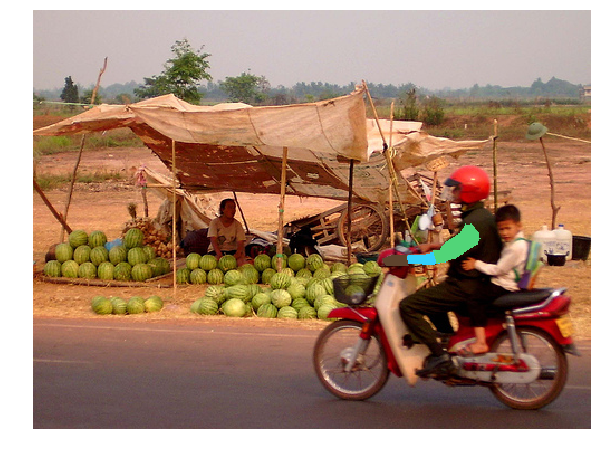

In [18]:
# Get mask for a superpart
print('Person superparts: ' + str(details.getSuperparts(cat='person')))
print('Person left arm: ')
mask = details.getMask(img, cat='person', instance='#0', superpart='leftarm', show=True)

Person left arm parts: [u'lhand', u'llarm', u'luarm']
Now displaying person's left hand...
showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


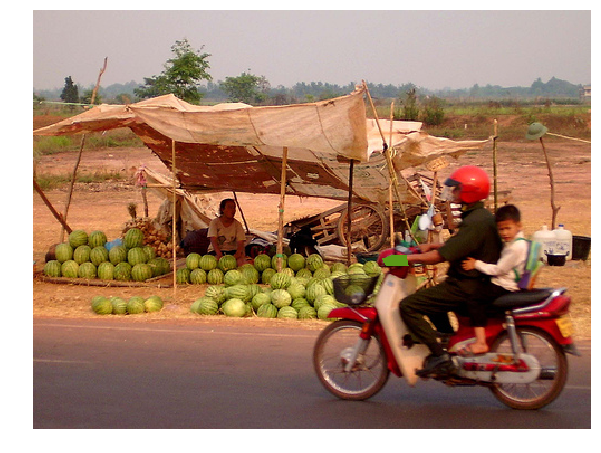

In [19]:
# Get mask for a single part
print('Person left arm parts: ' + str([p['name'] for p in details.getParts(cat='person', superpart='leftarm')]))
print('Now displaying person\'s left hand...')
mask = details.getMask(img, cat='person', instance='#0', part='lhand', show=True)

## Boundaries

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


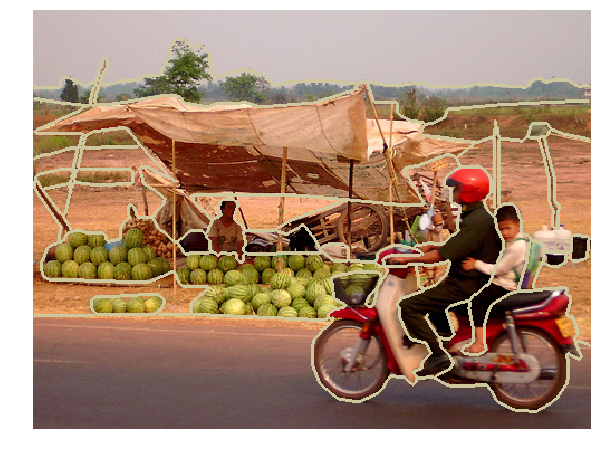

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


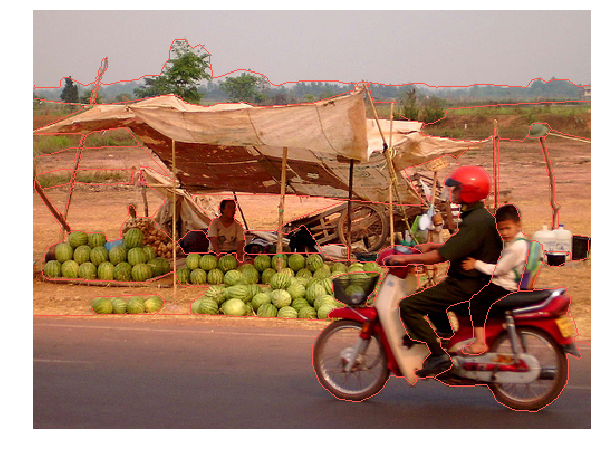

In [20]:
# Show boundaries for whole image (boundaries have been thickened for visualization)
mask = details.getBounds(img, show=True)

# Show raw boundaries mask, outputted by getBounds(), without thickened edges
details.showMask(mask, img)

## Occlusion

showing image 2008_003429.jpg: 
	image_id: 2008003429,
	width: 500,
	height: 375,
	phase: train,
	date_captured: 31-May-2015 17:45:00,


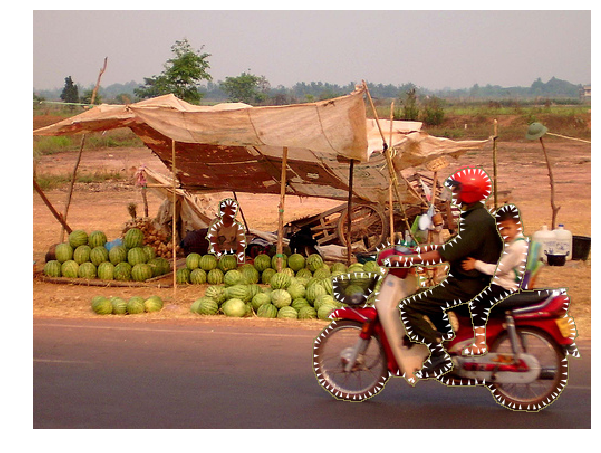

In [21]:
# Arrows along boundaries point towards occluder (away from occludee)
occl = details.getOccl(img, show=True)

In [22]:
# get help
help(Detail)

Help on class Detail in module detail:

class Detail
 |  Methods defined here:
 |  
 |  __init__(self, annotation_file='json/trainval_withkeypoints.json', image_folder='VOCdevkit/VOC2010/JPEGImages', phase='trainval')
 |      Constructor of Detail helper class for reading and visualizing annotations.
 |      :param annotation_file (str): location of annotation file
 |      :param image_folder (str): location to the folder that has pascal JPEG images.
 |      :param phase (str): image set to look at: train, val, test, or any combination
 |                          of the three (trainval, trainvaltest)
 |      :return:
 |  
 |  decodeMask(self, json)
 |      Convert json mask to binary mask.
 |      :return: binary mask (numpy 2D array)
 |  
 |  find_cat(self, index)
 |  
 |  getBboxes(self, img, cat='object', show=False)
 |      Get bounding box for each instance of given category in image.
 |      
 |      :param img : image containing bounding boxes
 |      :param cat : category or su

In [3]:
from maskrcnn_benchmark.data.datasets.detail import DetailDataset

imgDir='/home/mateusz/zpp/maskrcnn-benchmark/pascal/VOCdevkit/MINIMAL/JPEGImages'
annFile = '/home/mateusz/zpp/maskrcnn-benchmark/pascal/trainval_withkeypoints.json'
split = 'train'

a = DetailDataset(imgDir, annFile, split)

loading annotations into memory...
JSON root keys:dict_keys(['info', 'images', 'annos_segmentation', 'annos_occlusion', 'annos_boundary', 'annos_joints', 'categories', 'parts'])
Done (t=9.52s)
creating index...
14288 images loaded.
index created! (t=6.42s)


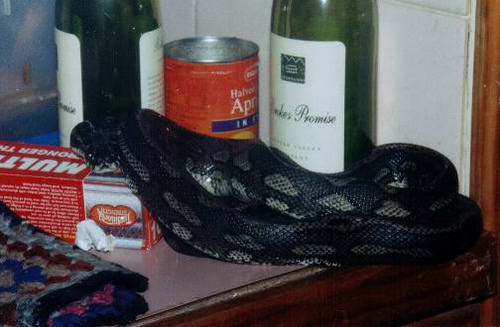

In [6]:
a[1][0]